In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as psx
import json

In [2]:
eda_df = pd.read_csv("Validation.csv")
eda_df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [3]:
eda_df.groupby(["car_name"]).size()

car_name
Audi A4              99
Audi A6              64
Audi A8               6
Audi Q7              23
BMW 3               152
                   ... 
Volkswagen Vento    247
Volvo S90             4
Volvo XC              7
Volvo XC60            5
Volvo XC90            4
Length: 121, dtype: int64

In [4]:
df = eda_df.groupby(["brand","car_name"]).count()
df

model  vehicle_age  km_driven  seller_type   
brand      car_name                                                       
Audi       Audi A4              99           99         99           99  \
           Audi A6              64           64         64           64   
           Audi A8               6            6          6            6   
           Audi Q7              23           23         23           23   
BMW        BMW 3               152          152        152          152   
...                            ...          ...        ...          ...   
Volkswagen Volkswagen Vento    247          247        247          247   
Volvo      Volvo S90             4            4          4            4   
           Volvo XC              7            7          7            7   
           Volvo XC60            5            5          5            5   
           Volvo XC90            4            4          4            4   

                             fuel_type  transmission_type  mileage  engine   
brand      car_name                                                          
Audi       Audi A4                  99                 99       99      99  \
           Audi A6                  64                 64       64      64   
           Audi A8                   6                  6        6       6   
           Audi Q7                  23                 23       23      23   
BMW        BMW 3                   152                152      152     152   
...                                ...                ...      ...     ...   
Volkswagen Volkswagen Vento        247                247      247     247   
Volvo      Volvo S90                 4                  4        4       4   
           Volvo XC                  7                  7        7       7   
           Volvo XC60                5                  5        5       5   
           Volvo XC90                4                  4        4       4   

                             max_power  seats  selling_price  
brand      car_name                                           
Audi       Audi A4                  99     99             99  
           Audi A6                  64     64             64  
           Audi A8                   6      6              6  
           Audi Q7                  23     23             23  
BMW        BMW 3                   152    152            152  
...                                ...    ...            ...  
Volkswagen Volkswagen Vento        247    247            247  
Volvo      Volvo S90                 4      4              4  
           Volvo XC                  7      7              7  
           Volvo XC60                5      5              5  
           Volvo XC90                4      4              4  

[121 rows x 11 columns]

In [5]:
#Num of Models 
df_models = df.groupby(["brand"]).count().iloc[:,[0]].reset_index()
df_models

,brand,model
0,Audi,4
1,BMW,9
2,Bentley,1
3,Datsun,3
4,Ferrari,1
5,Force,1
6,Ford,5
7,Honda,7
8,Hyundai,10
9,ISUZU,1


In [6]:
#saved dict of Models
dict_models = df_models.to_dict()
with open("Models_dict","w") as f:
    json.dump(dict_models,f,indent=2)

In [7]:
#vehicle age vs num_cars
new = eda_df[["car_name","vehicle_age"]]
num_of_cars = new.groupby(["vehicle_age"]).count().rename(columns={"car_name":"num_cars"}).reset_index()
num_of_cars

,vehicle_age,num_cars
0,0,5
1,1,221
2,2,1145
3,3,1926
4,4,2252
5,5,2116
6,6,1924
7,7,1438
8,8,1282
9,9,1027


In [8]:
#Num of Seller type per car
Count_seller_type = eda_df.groupby(["car_name","seller_type"]).size().to_frame().rename(columns={0:"Count"}).reset_index()
Count_seller_type

,car_name,seller_type,Count
0,Audi A4,Dealer,84
1,Audi A4,Individual,15
2,Audi A6,Dealer,58
3,Audi A6,Individual,6
4,Audi A8,Dealer,5
...,...,...,...
238,Volvo S90,Dealer,4
239,Volvo XC,Dealer,7
240,Volvo XC60,Dealer,5
241,Volvo XC90,Dealer,3


In [9]:
#Avg Km_Driven per Cars
avg_km_cars = eda_df.groupby(["car_name"])["km_driven"].mean().round(2).to_frame().rename(columns={"km_driven":"Avg_km_driven"}).reset_index().sort_values(by="Avg_km_driven",ascending=True)
avg_km_cars

,car_name,Avg_km_driven
103,Tata Altroz,3800.00
17,Ferrari GTC4Lusso,3800.00
31,Hyundai Aura,4500.00
99,Rolls-Royce Ghost,5000.00
75,Maruti S-Presso,5430.77
...,...,...
111,Toyota Fortuner,90764.71
107,Tata Safari,92685.23
113,Toyota Innova,96895.21
119,Volvo XC60,101650.40


In [10]:
#Fuel_type per car
Count_fuel_type = eda_df.groupby(["car_name","fuel_type"]).size().to_frame().rename(columns={0:"Count"}).reset_index()
Count_fuel_type

,car_name,fuel_type,Count
0,Audi A4,Diesel,83
1,Audi A4,Petrol,16
2,Audi A6,Diesel,59
3,Audi A6,Petrol,5
4,Audi A8,Diesel,5
...,...,...,...
196,Volkswagen Vento,Petrol,104
197,Volvo S90,Diesel,4
198,Volvo XC,Diesel,7
199,Volvo XC60,Diesel,5


In [11]:
#Avg Mileage vs km_driven 
avg_mileage_km_driven = eda_df.groupby(["km_driven"])["mileage"].mean().to_frame().rename(columns={"mileage":"Avg_Mileage"}).reset_index().sort_values(by=["km_driven","Avg_Mileage"],ascending=True)
avg_mileage_km_driven.max()

km_driven      1325000.00
Avg_Mileage         33.54
dtype: float64

In [12]:
#Avg Power vs Engine
avg_power_engine = eda_df.groupby(["engine"])["max_power"].mean().to_frame().rename(columns={"max_power":"Avg_Power"}).reset_index()
print(avg_power_engine[avg_power_engine["Avg_Power"]==601.0])

     engine  Avg_Power
100    3855      601.0


In [13]:
avg_power_engine.min()
avg_power_engine

,engine,Avg_Power
0,793,47.000000
1,796,46.625749
2,799,53.380870
3,998,67.938211
4,999,71.792149
...,...,...
105,4663,459.000000
106,4806,429.533333
107,5461,362.900000
108,5998,592.666667


In [14]:
eda_df.head(2)

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.7,796,46.3,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.9,1197,82.0,5,550000


<h1><b>Univariate Analysis</b></h1>

In [15]:
psx.box(eda_df,x="vehicle_age")

In [16]:
psx.box(eda_df,x="max_power")

In [17]:
psx.box(eda_df,x="km_driven")

<h1><b>Bivariate Analysis</b></h1>

In [27]:
fig = psx.scatter(eda_df,x="km_driven",y="selling_price",color="fuel_type")
fig.update_layout(width=1000, height=500)
fig.write_image("SellingPriceKmdriven.png")

In [28]:
fig = psx.pie(Count_seller_type,names="seller_type",values="Count")
fig.update_layout(width=1000, height=800)
fig.write_image("PieSellerCount.jpg")

In [29]:
fig = psx.pie(df_models,names="brand",values="model")
fig.update_layout(width=1000, height=800)
fig.write_image("PieBrandModel.jpg")

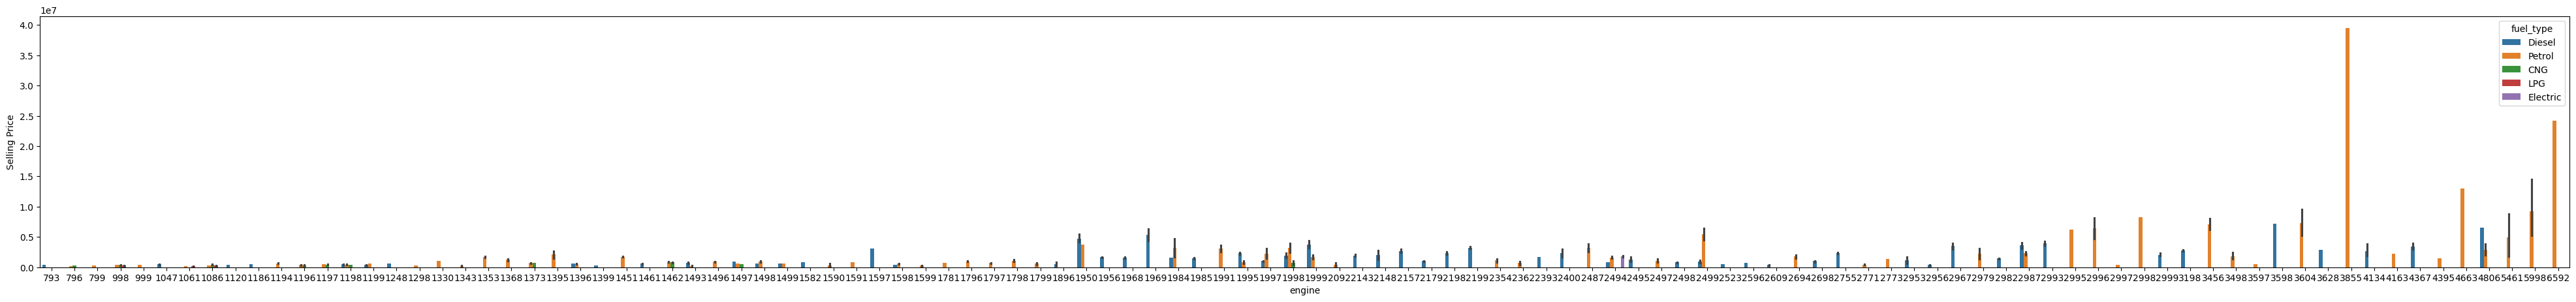

In [30]:
plt.figure(figsize=(50,5))
sns.barplot(data=eda_df,x="engine",y="selling_price",hue="fuel_type")
plt.xlabel("engine")
plt.ylabel("Selling Price")
fig.update_layout(width=1000, height=800)
plt.savefig("EngineSellingPrice.png")
plt.show()

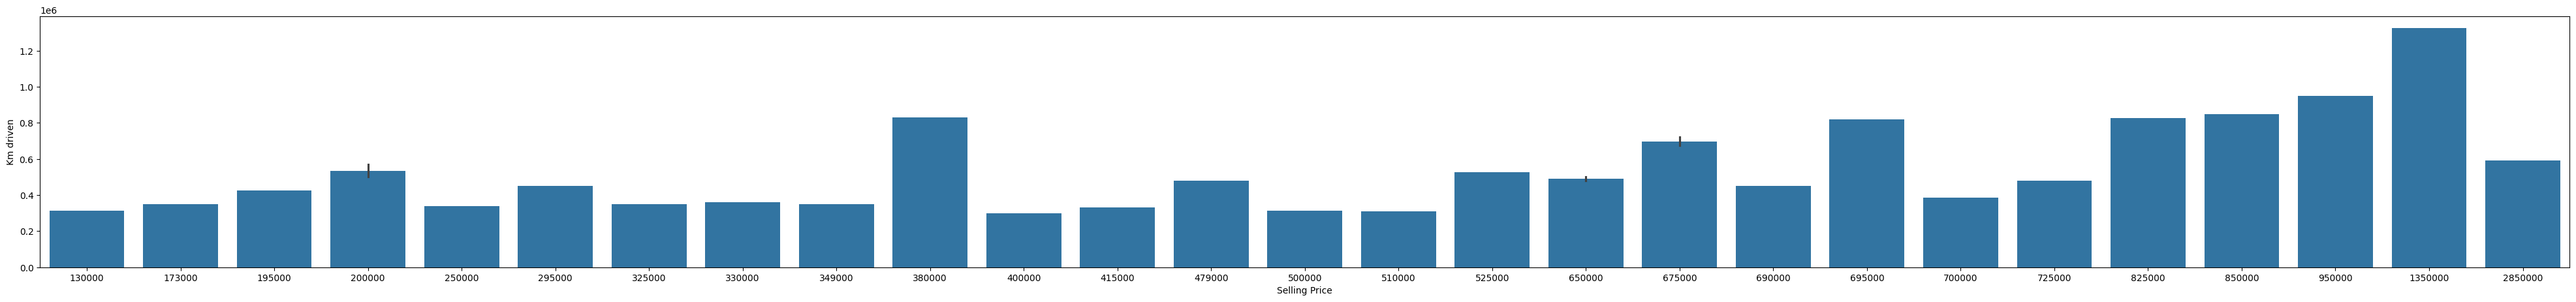

In [31]:
plt.figure(figsize=(50,5))
sns.barplot(data=eda_df.sort_values(by=["km_driven","selling_price"],ascending=False).head(30),x="selling_price",y="km_driven")
plt.xlabel("Selling Price")
plt.ylabel("Km driven")
fig.update_layout(width=1000, height=800)
plt.savefig("SellingPricekmdriven.jpg")
plt.show()

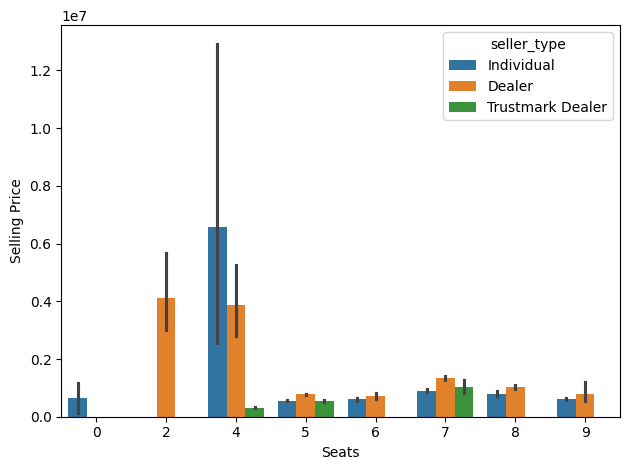

In [33]:
sns.barplot(data=eda_df,x="seats",y="selling_price",hue="seller_type")
plt.xlabel("Seats")
plt.ylabel("Selling Price")
plt.tight_layout()
fig.update_layout(width=1000, height=800)
plt.savefig("SeatsSellingPrice.jpg")
plt.show()

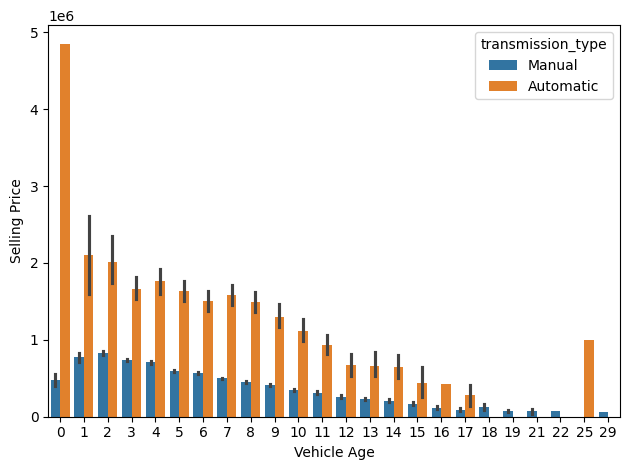

In [34]:
sns.barplot(data=eda_df,x="vehicle_age",y="selling_price",hue="transmission_type")
plt.xlabel("Vehicle Age")
plt.ylabel("Selling Price")
plt.tight_layout()
fig.update_layout(width=1000, height=800)
plt.savefig("VehicleAgeSellingPrice.jpg")
plt.show()

In [35]:
fig = psx.bar(avg_power_engine,title="Engine Vs Avg-Power")
fig.update_layout(xaxis_title="Avg Power",yaxis_title="Engine")
fig.update_layout(width=1000, height=800)
fig.write_image("EngineAvg-Power.jpg")

In [36]:
fig = psx.strip(avg_mileage_km_driven,x="km_driven",y="Avg_Mileage",title="Km Vs Avg Mileage")
fig.update_layout(xaxis_title="Km",yaxis_title="AvgMileage")
fig.update_layout(width=1000, height=800)
fig.write_image("KmDrivenAvgMileage.jpg")

In [37]:
avg_km_cars
fig = psx.bar(avg_km_cars,x="car_name",y="Avg_km_driven",title="Cars Vs Avg Km")
fig.update_layout(xaxis_title="Cars",yaxis_title="Avg Km")
fig.update_layout(width=1000, height=800)
fig.write_image("CarAvgKm.jpg")

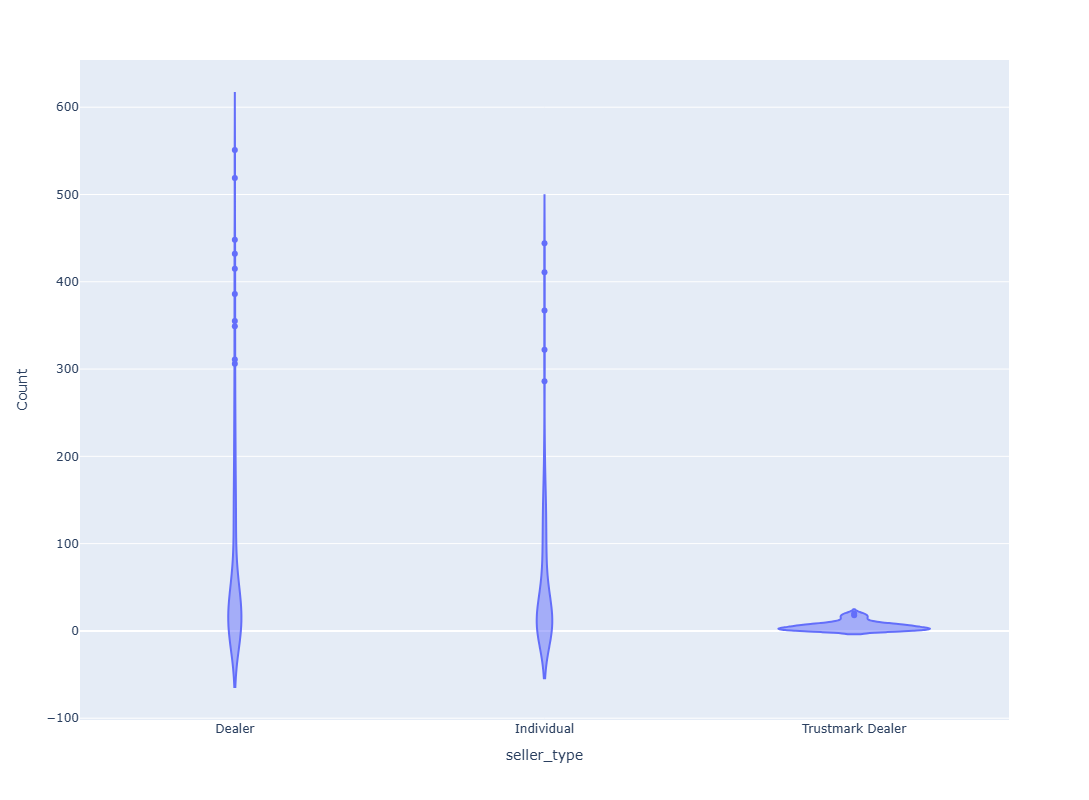

In [38]:
fig = psx.violin(Count_seller_type,x="seller_type",y="Count")
fig.update_layout(width=1000, height=800)
fig.write_image("SellerCount.jpg")
fig.show()


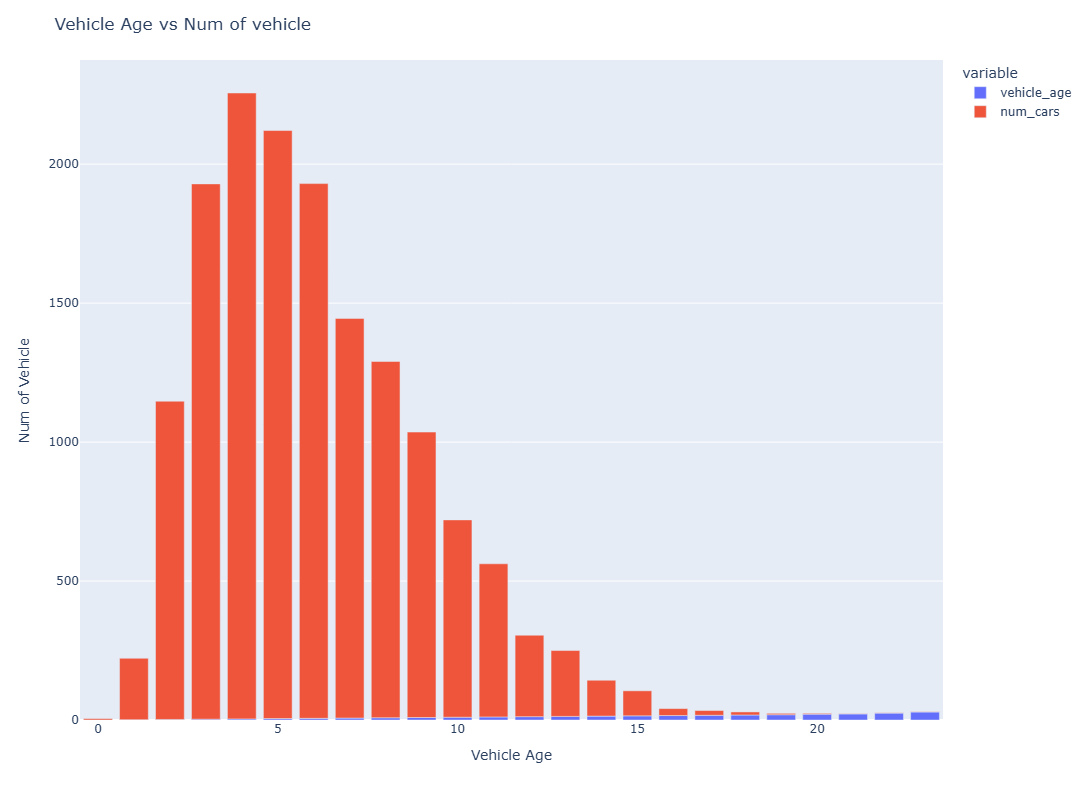

In [39]:
fig = psx.bar(num_of_cars)
fig.update_layout(xaxis_title="Vehicle Age",yaxis_title="Num of Vehicle",title="Vehicle Age vs Num of vehicle")
fig.update_layout(width=1000, height=800)
fig.write_image("VehicleAgeNumOFVehicle.jpg")
fig.show()


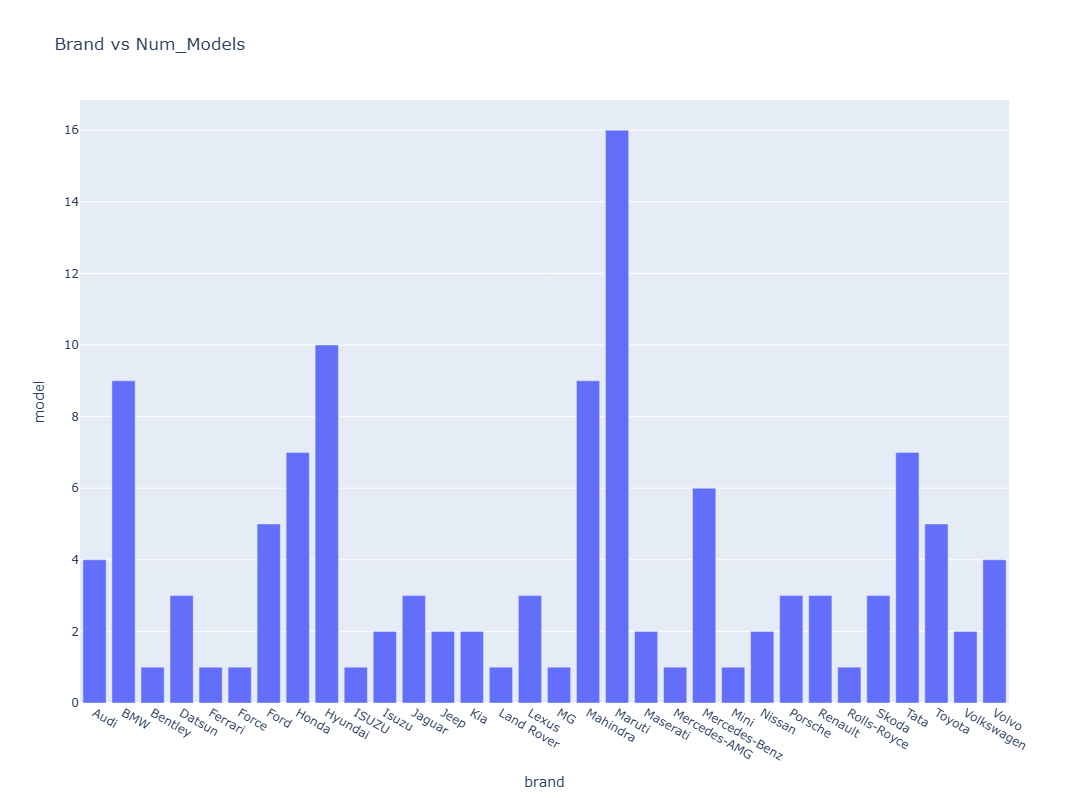

In [40]:
fig = psx.bar(df_models,x="brand",y="model",title="Brand vs Num_Models")
fig.update_layout(width=1000, height=800)
fig.write_image("brandmodel.jpg")
fig.show()


<h1><b>Final Report: Exploratory Data Analysis</b></h1>
